In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
from scipy.constants import *
from qutip import tensor, qeye, jmat

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

mpl.rcParams['figure.figsize'] = (8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size'] = 14                #10
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['savefig.dpi'] = 100             #72 
mpl.rcParams['figure.subplot.bottom'] = .1    #.125

## 85Rb 5S_1/2

In [2]:
# Define quantum numbers
S = 1/2 # spin of electron
I = 5/2 # nuclear spin of 85Rg
L = 0   # orbital angular momentum ( 0 for S, 1 for P and 2 for D)
J = S + L # total electron angular momentum
F = I + J # total system angular momentum
NI = 2*I + 1
NJ = 2*J + 1

In [13]:
# Define constants
muB = (elementary_charge*hbar)/(2*electron_mass) # Bohr magneton
muN = (elementary_charge*hbar)/(2*proton_mass)   # nuclear magneton
gL = 1/(1+electron_mass/(85*atomic_mass))
gS = 2.0023193043622
gJ = gL*(J*(J+1)-S*(S+1)+L*(L+1))/(2*J*(J+1)) + gS*(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))
gI = - 0.00029364000 # nuclear g-factor

A_S12 = 1.0119108130e9 # Magnetic Dipole Constant 5S_1/2
A_P12 = 120.527e6
A_P32 = 25.0020e6
B_P32 = 25.790e6 # Electric Quadrupole Constant

In [24]:
# Define Operators

Ix = tensor(jmat(I,'x'),qeye(int(NJ)))
Iy = tensor(jmat(I,'y'),qeye(int(NJ)))
Iz = tensor(jmat(I,'z'),qeye(int(NJ)))

Jx = tensor(qeye(int(NI)),jmat(J,'x'))
Jy = tensor(qeye(int(NI)),jmat(J,'y'))
Jz = tensor(qeye(int(NI)),jmat(J,'z'))

IJ = Ix*Jx+Iy*Jy+Iz*Jz

H_Z = (muB/h)*(gI*Iz + gJ*Jz) # Zeeman Hamiltonian
H_HF = A_S12*(IJ)  # Hyperfine Hamiltonian

In [45]:
# Function that gives the energy as function of magnetic field

def energy(B):
    En = np.zeros((len(B),H_Z.shape[0]))
    for i in range(len(B)):
        En[i,:] = (H_HF + B[i]*H_Z).eigenenergies(sort='low')
    return En

Text(0.42, -4.25, '$mj = -1/2$')

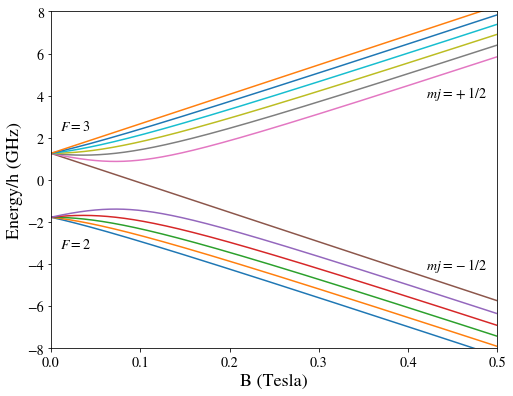

In [65]:
plt.figure()

B = np.linspace(0,0.6,6000)
plt.plot(B,energy(B)*1e-9);
plt.xlim([0,0.5])
plt.ylim([-8,8])
plt.ylabel('Energy/h (GHz)')
plt.xlabel('B (Tesla)')
#ax.set_xticks(np.arange(0,0.2,0.05))
#ax.set_yticks(np.arange(-3,4))
#ax.set_xticks(np.arange(0,0.15,0.01), minor=True)
#ax.set_yticks(np.arange(-3,4,0.5), minor=True)
plt.grid(which='minor', alpha=0.25)
plt.text(0.01, 2.35, '$F = 3$')
plt.text(0.01, -3.25, '$F = 2$')
plt.text(0.42, 3.95, '$mj = +1/2$')
plt.text(0.42, -4.25, '$mj = -1/2$')

## 5P_3/2

In [111]:
# Define quantum numbers
S = 1/2 # spin of electron
I = 5/2 # nuclear spin of 85Rb
L = 1   # orbital angular momentum ( 0 for S, 1 for P and 2 for D)
J = S + L # total electron angular momentum
F = I + J # total system angular momentum
NI = 2*I + 1
NJ = 2*J + 1

# Define constants
muB = (elementary_charge*hbar)/(2*electron_mass) # Bohr magneton
muN = (elementary_charge*hbar)/(2*proton_mass)   # nuclear magneton
gL = 1/(1+electron_mass/(85*atomic_mass))
gS = 2.0023193043622
gJ = gL*(J*(J+1)-S*(S+1)+L*(L+1))/(2*J*(J+1)) + gS*(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))
gI = - 0.00029364000 # nuclear g-factor

A_S12 = 1.0119108130e9 # Magnetic Dipole Constant 5S_1/2 (Hz)
A_P12 = 120.527e6 # Hz
A_P32 = 25.0020e6 # Hz
B_P32 = 25.790e6 # Electric Quadrupole Constant

# Define Operators

Ix = tensor(jmat(I,'x'),qeye(int(NJ)))
Iy = tensor(jmat(I,'y'),qeye(int(NJ)))
Iz = tensor(jmat(I,'z'),qeye(int(NJ)))

Jx = tensor(qeye(int(NI)),jmat(J,'x'))
Jy = tensor(qeye(int(NI)),jmat(J,'y'))
Jz = tensor(qeye(int(NI)),jmat(J,'z'))

IJ = Ix*Jx+Iy*Jy+Iz*Jz

H_Z = (muB/h)*(gI*Iz + gJ*Jz) # Zeeman Hamiltonian
H_HF = A_P32*(IJ) + B_P32*(3*(IJ**2)+1.5*IJ-I*(I+1)*J*(J+1))/(2*I*(2*I-1)*J*(2*J-1))  # Hyperfine Hamiltonian

# Function that gives the energy as function of magnetic field

def energy(B):
    En = np.zeros((len(B),H_Z.shape[0]))
    for i in range(len(B)):
        En[i,:] = (H_HF + B[i]*H_Z).eigenenergies(sort='low')
    return En

Text(169, -350, '$mj = -1/2$')

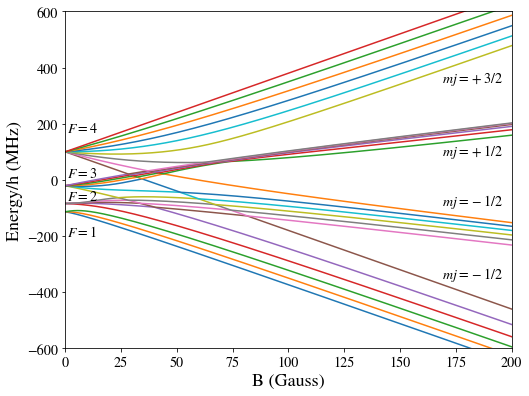

In [110]:
plt.figure()

B = np.linspace(0,0.02,1000)
plt.plot(B*1e4,energy(B)*1e-6);
plt.xlim([0,200])
plt.ylim([-600,600])
plt.ylabel('Energy/h (MHz)')
plt.xlabel('B (Gauss)')
#ax.set_xticks(np.arange(0,0.2,0.05))
#ax.set_yticks(np.arange(-3,4))
#ax.set_xticks(np.arange(0,0.15,0.01), minor=True)
#ax.set_yticks(np.arange(-3,4,0.5), minor=True)
plt.grid(which='minor', alpha=0.25)
plt.text(1, 170, '$F = 4$')
plt.text(1, 10, '$F = 3$')
plt.text(1, -70, '$F = 2$')
plt.text(1, -200, '$F = 1$')
plt.text(169, 350, '$mj = +3/2$')
plt.text(169, 90, '$mj = +1/2$')
plt.text(169, -90, '$mj = -1/2$')
plt.text(169, -350, '$mj = -1/2$')

In [119]:
H_HF = A_P32*(IJ) + B_P32*(3*(IJ**2)+1.5*IJ-I*(I+1)*J*(J+1))/(2*I*(2*I-1)*J*(2*J-1))
H_HF.eigenenergies()/1e6

array([-113.2075, -113.2075, -113.2075,  -83.8355,  -83.8355,  -83.8355,
        -83.8355,  -83.8355,  -20.435 ,  -20.435 ,  -20.435 ,  -20.435 ,
        -20.435 ,  -20.435 ,  -20.435 ,  100.205 ,  100.205 ,  100.205 ,
        100.205 ,  100.205 ,  100.205 ,  100.205 ,  100.205 ,  100.205 ])